In [16]:
# plot results from 2D kinematic corner flow calculations
import numpy as np
import matplotlib.pyplot as plt

In [22]:
import os
import sys
try:
    petsc_dir = os.environ['PETSC_DIR']
except KeyError:
    %env PETSC_DIR /opt/petsc-3.5
    petsc_dir = os.environ['PETSC_DIR']
try:
    petsc_arch = os.environ['PETSC_ARCH']
except KeyError:
    %env PETSC_ARCH arch-linux2-c-opt
    petsc_arch = os.environ['PETSC_ARCH']
sys.path.append(petsc_dir + '/bin/pythonscripts')

import PetscBinaryIO

env: PETSC_ARCH=arch-linux2-c-opt


In [29]:
# load the output
output_dir='/home/max/subduction/simulation_runs/subduction_test66/output'
filename = 'loadNodalFields_0_40000.petscbin'
nx, ny = 264, 251

io=PetscBinaryIO.PetscBinaryIO()
try:
    tmp=io.readBinaryFile(output_dir+'/'+filename)
except NotImplementedError:
    print("blah")
    
vx = tmp[0].reshape((ny,nx))
vy = tmp[1].reshape((ny,nx))
coords = tmp[-1].reshape((ny,nx,2))
xx = coords[:,:,0]
yy = coords[:,:,1]
T = tmp[8].reshape((ny,nx))
P = tmp[2].reshape((ny,nx))

xc = np.zeros((ny-1,nx-1))
yc = np.zeros((ny-1,nx-1))
for i in range(nx-1):
    for j in range(ny-1):
        xc[j,i] = 0.5*(xx[j,i] + xx[j,i+1])
        yc[j,i] = 0.5*(yy[j,i] + yy[j+1,i])

# make interpolated data
from scipy.interpolate import griddata
x = np.linspace(xx.min(), xx.max(), 200)
y = np.linspace(yy.min(), yy.max(), 200)
px = xx.flatten()
py = yy.flatten()
xi, yi = np.meshgrid(x,y)
fx = vx.flatten()

gvx = griddata( (px,py), fx, (xi,yi),method='linear' )
gvy = griddata( (px,py), vy.flatten(), (xi,yi) )
gT = griddata(  (px,py), T.flatten(), (xi,yi) )
gP = griddata(  (px,py), P.flatten(), (xi, yi) )

/opt/petsc-3.5/bin/pythonscripts/petsc_conf.py:36: UserWarning: Nonexistent or invalid PETSc installation, using defaults
  warnings.warn('Nonexistent or invalid PETSc installation, using defaults')


Bag reader not implemented


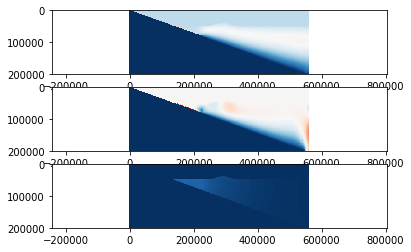

In [35]:
f, (ax1,ax2,ax3) =plt.subplots(3,1)
ax1.pcolormesh(xx,yy,vx,cmap='RdBu')
ax1.axis('equal')
ax1.invert_yaxis()
ax2.pcolormesh(xx,yy,vy,cmap='RdBu')
ax2.axis('equal')
ax2.invert_yaxis()
ax3.pcolormesh(xx,yy,P,cmap='RdBu')
ax3.axis('equal')
ax3.invert_yaxis()

plt.show()

In [33]:
vy.shape


(251, 264)

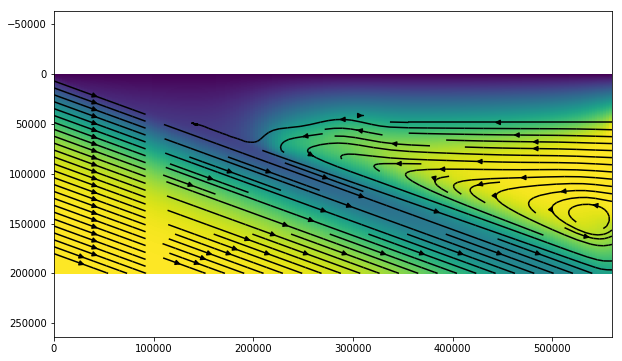

In [122]:
# plot the streamlines
f, ax = plt.subplots(1,1,figsize=(10,6))
#ax.tricontourf(xx.reshape((nx*ny,)),yy.reshape((nx*ny,)),T.reshape((nx*ny,)),vmin=0.0,vmax=1600.)
ax.pcolormesh(xi,yi,gT)
#ax.streamplot(xx,yy,vx,vy)

ax.streamplot(xi,yi,gvx,gvy,density=1.,color='k')
ax.invert_yaxis()
ax.axis('equal')
plt.show()

In [123]:
xx.max()


Vec(560000.0)